In [6]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the model

Loading VGG19, stripping the last 3 layers and max-pooling the features to give 512 outputs.

In [37]:
model = keras.applications.vgg19.VGG19(include_top=False,
                                       weights='imagenet',
                                       input_tensor=None,
                                       input_shape=(224, 224, 3),
                                       pooling='max')


## Creating some images

In [8]:
image = np.zeros((3, 224, 224))

In [11]:
image.shape

(3, 224, 224)

In [12]:
from PIL import Image, ImageDraw

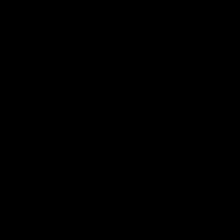

In [13]:
im = Image.new('RGB', (224, 224))
im

In [14]:
draw = ImageDraw.Draw(im)

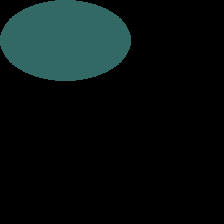

In [15]:
draw.ellipse([0, 0, 130, 80],
             (50,105,100))
im

In [16]:
a = np.random.randint(0, 10, (6,7))

In [17]:
a

array([[9, 4, 3, 8, 8, 3, 8],
       [8, 3, 5, 5, 9, 8, 9],
       [1, 2, 9, 1, 7, 7, 5],
       [9, 1, 7, 0, 0, 3, 1],
       [8, 2, 7, 5, 5, 6, 4],
       [6, 9, 7, 4, 5, 8, 2]])

In [18]:
a[np.argsort(a[:, 1])]

array([[9, 1, 7, 0, 0, 3, 1],
       [1, 2, 9, 1, 7, 7, 5],
       [8, 2, 7, 5, 5, 6, 4],
       [8, 3, 5, 5, 9, 8, 9],
       [9, 4, 3, 8, 8, 3, 8],
       [6, 9, 7, 4, 5, 8, 2]])

## A picture of a cat

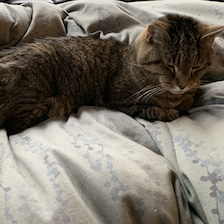

In [39]:
ali = Image.open("ali.png")
ali

In [34]:
aliarray = np.array(ali)[None, :, :, 0:3]

In [38]:
model.predict(aliarray).shape

(1, 512)

## Testing the code

In [112]:
from figure import Figure

In [136]:
f = Figure()

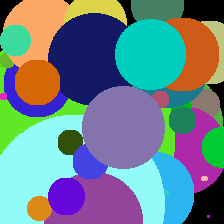

In [137]:
fim = f.draw(224)
fim

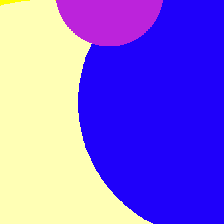

In [145]:
f2 = f.clone_and_mutate()
f2.draw(224)

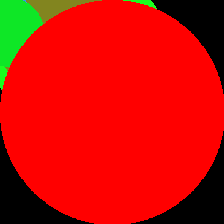

In [105]:
drawfim.ellipse([0,0,224,224], (255, 0, 0))
fim

In [51]:
tuple(np.array([1,2,3]))

(1, 2, 3)

In [76]:
np.zeros((2,)).tolist()

[0.0, 0.0]